# Exercício 2

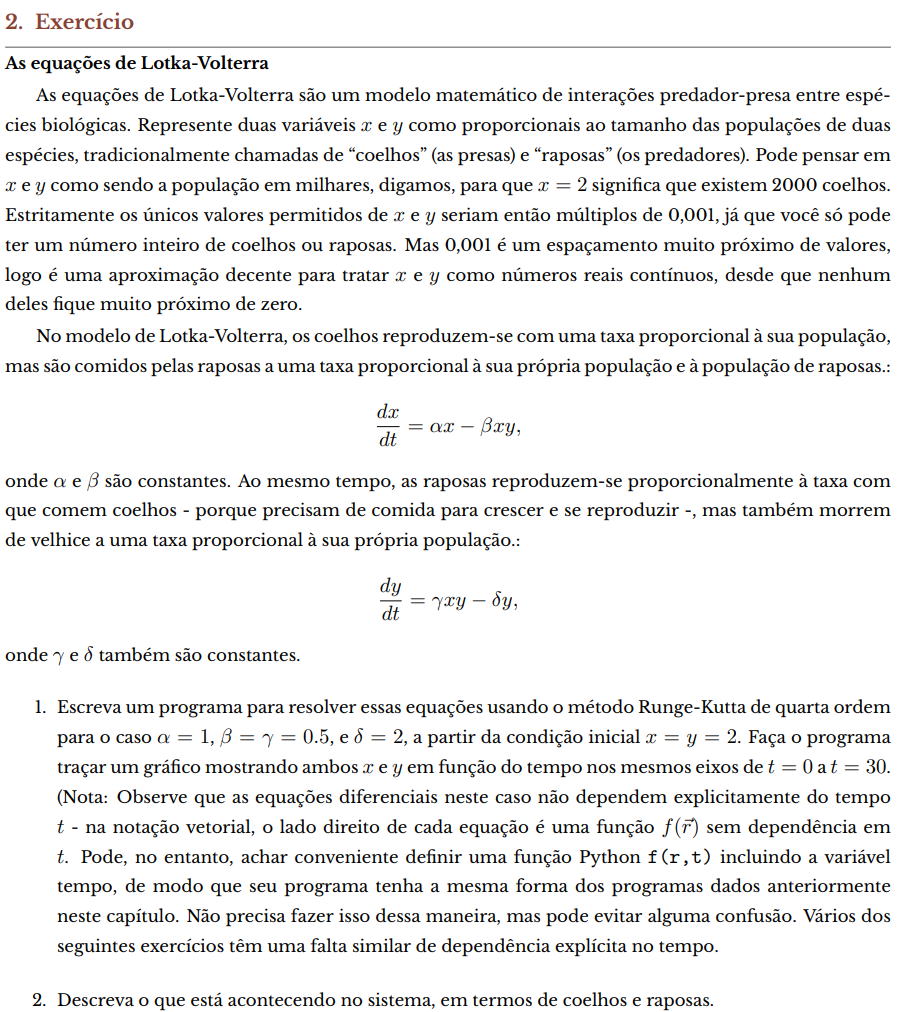

In [1]:
from typing import Callable
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt

## Alínea 1

In [2]:
def f(r: np.ndarray, t: float) -> np.ndarray:
    alpha, beta, gamma, delta = 1, 0.5, 0.5, 2
    x, y = r[0], r[1]

    return np.array([alpha * x - beta * x * y, gamma * x * y - delta * y])

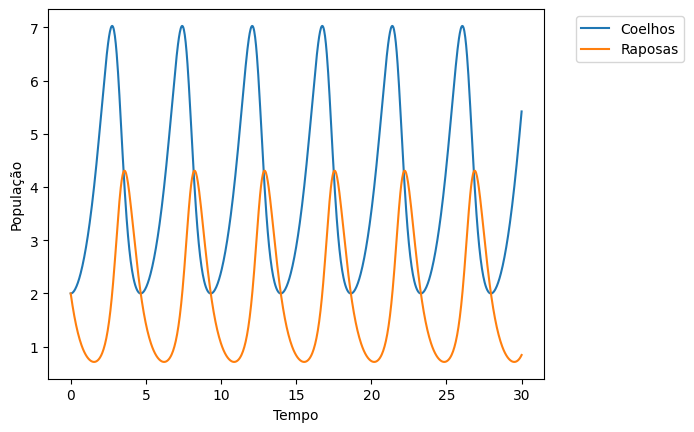

In [10]:
def rk4(start: float, end: float, func: Callable, N: int, x0: npt.ArrayLike) -> tuple[np.ndarray, np.ndarray]:
    """
        Resolve a equação `x'(t) = func(x, t)` usando o método de Runge-Kutta de Quarta Ordem Clássico começando em `start` e terminando em `end` com `N` passos sendo `x(start) = x0`.
    """

    # Passo
    h = (end - start) / N
    tt = np.linspace(start, end, N+1)
    xx = [x0]

    for step in range(N):
        xn = xx[step]
        tn = tt[step]

        k1 = func(xn, tn)
        k2 = func(xn + h/2 * k1, tn + h/2)
        k3 = func(xn + h/2 * k2, tn + h/2)
        k4 = func(xn + h * k3, tn + h)
        
        xx += [xn + h * (k1 + 2*k2 + 2*k3 + k4)/6]
    
    return tt, np.array(xx)


tt, sol = rk4(0, 30, f, 1000, np.array([2, 2]))
xx = np.array([item[0] for item in sol])
yy = np.array([item[1] for item in sol])

plt.plot(tt, xx, label="Coelhos")
plt.plot(tt, yy, label="Raposas")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel("Tempo")
plt.ylabel("População")
plt.show()

## Alínea 2

Conseguimos ver que:
- Inicialmente há poucos coelhos, pelo que o número de raposas diminui já que não têm comida suficiente.
- Como tal, o número de coelhos aumenta muito, tendo como consequência o aumento do número de raposas.
- O maior número de raposas faz diminuir a população de coelhos, recomeçando o ciclo.

# Refazer com Leapfrog

In [3]:
def leapfrog(start: float, end: float, func: Callable, N: int, x0: (float | np.ndarray)) -> tuple[np.ndarray, np.ndarray]:
    """
        Resolve o sistema de K EDOs `dx/dt = func(x, t)` usando o método Leapfrog começando em `start` e terminando em `end` com `N` passos sendo `x(start) = x0`.

        A função `func` deve aceitar dois argumentos: um array `x` com K entradas e um float `t`. O argumento `x0` deve também ter K entradas.

        ### Retorno
        tt: Array com os valores da variável independente `t`
        xx: Array com os resultados em função de `t` sendo que para K > 1 cada elemento do array é um array com o valor das várias funções em `t`.
    """

    # Passo
    h = (end - start) / N
    tt = [start]
    xx = [x0]

    # Valor de x(t + h/2)
    xleap = x0 + h * func(x0, start) / 2

    xh = x0
    th = start
    for _ in range(N):
        # Valor de x(t + h)
        xh = xh + h * func(xleap, th + h/2)
        th = th + h

        # Valor de x(t + h * 3/2)
        xleap = xleap + h * func(xh, th)
        
        xx += [xh]
        tt += [th]
    
    return np.array(tt), np.array(xx)

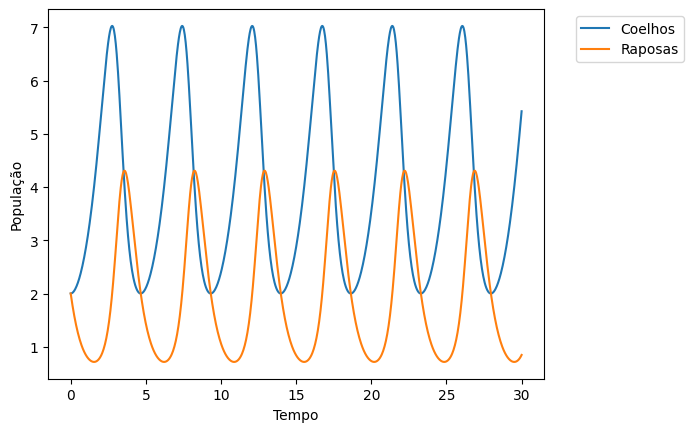

In [5]:
tt, sol = leapfrog(0, 30, f, 1000, np.array([2.0, 2.0]))
xx = np.array([item[0] for item in sol])
yy = np.array([item[1] for item in sol])

plt.plot(tt, xx, label="Coelhos")
plt.plot(tt, yy, label="Raposas")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel("Tempo")
plt.ylabel("População")
plt.show()